In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# figure aesthetics
plt.style.use('ggplot')
sns.set_context('talk')
sns.set_style({'axes.spines.right': False,
             'axes.spines.top': False,
             'axes.edgecolor': 'black'})

# Importing and cleaning data

In [3]:
df = pd.read_csv('./data/KaggleV2-May-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let's rename the Handcap column

In [5]:
df.rename(columns={'Handcap' : 'Handicap'}, inplace=True)

The PatientId column should probably be an integer number.

In [6]:
df['PatientId'] = df['PatientId'].astype(int)

How many patints are there?

In [7]:
df['PatientId'].nunique()

62299

Let's look at all the datatypes

In [8]:
df.dtypes

PatientId          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
SMS_received       int64
No-show           object
dtype: object

Let's set the date columns to datetime format.

In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Now let check for nan and duplicates:

In [10]:
if ~df.duplicated().any():
    print("No duplicate rows.")

No duplicate rows.


In [11]:
if ~df.isna().any().all():
    print("No NaNs.")

No NaNs.


Finally, let's check for outliers.

In [12]:
# are genders binary?
print(df['Gender'].unique())

['F' 'M']


Text(0.5, 0, 'Age')

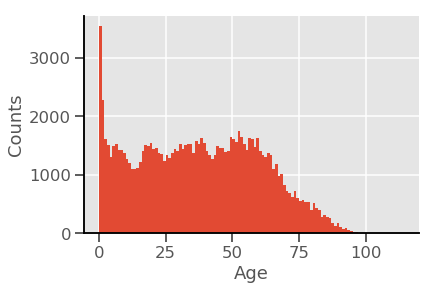

In [13]:
# what is the age distribution?
plt.hist(df['Age'], np.arange(0,115,1));
plt.ylabel('Counts')
plt.xlabel("Age")

Age distribution looks reasonble. A lot of the patients are new-borns apparently. What are the actual stats?

In [14]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Look's like we have a couple of outliers. The minimum patient age is -1, how many times does it happen?

In [15]:
(df['Age'] < 0).sum()

1

Let's drop it.

In [16]:
df = df.loc[df['Age'] >= 0 ]

How many patients are over 100?

In [17]:
(df['Age'] > 100).sum()

7

Only 7. Compared to around 60k patients, so I'll drop these as well.

In [18]:
df = df.loc[df['Age'] <= 100]

Let's check out the other numerical data.

In [19]:
df.select_dtypes(np.number).nunique()

PatientId         62294
AppointmentID    110519
Age                 101
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handicap              5
SMS_received          2
dtype: int64

Looks like the other variables are binary except for Handicap.

In [20]:
df['Handicap'].unique()

array([0, 1, 2, 3, 4])

In [22]:
df['Handicap'].value_counts()

0    108282
1      2038
2       183
3        13
4         3
Name: Handicap, dtype: int64

These values could just mean different kinds or levels so I'll leave them and trust the data on this one.

# Exploring and engineering features 